In [ ]:
######## LESSON 4: BASIC DATA ANALYSIS #########

In [ ]:
'''In this lesson, we will go over how to use python to perform basic statistical
analysis and how to visualize your results. We will also go over ways to use 
Python to do simple analyses that GUI-based programs may not be able to do'''

In [ ]:
# In order to complete this lesson, you'll need to download and install a few libraries
# that don't come standard with Anaconda package. Fortunately, its very easy to download
# packages using Anaconda.

# The packages you'll need are the following:

# seaborn    # data visualization
# matplotlib # data visualization

# A handy resource for installing packages with conda can be found here: 
# https://conda.io/docs/using/pkgs.html
# In addition, conda's errors are very user-friendly and straightforward
# so you could probably figure out how to do this for yourself. But, in 
# the interest of time, simply do the following

# 1) Open a terminal or command-prompt 
# 2) Type conda install [package]

# That's it! If it doesn't work, conda will tell you why and will provide
# helpful clues for making it happen.

# You should also update the package statsmodels:
# conda update statsmodels

# You may need to restart your kernel for the changes to apply


In [33]:
# First, we'll import some modules that we will need for this lesson
import os,sys
import pandas
import statsmodels
import numpy as np
from copy import deepcopy
# notice I'm importing this next module *as* stat. this is a shortcut so I don't have to type scipy.stats each time
import scipy.stats as stat 

# again I'm loading these libraries into simpler names
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# We also want our plots to show inside of oure jupyter notebook. If we didn't do this, we'd
# have to type plot.show() every time we wanted to visualize our plot...

#%matplotlib inline 

In [4]:
# We will use two visualization libraries: matplotlib and seaborn. matplotlib is a bit finicky
# and not entirely intuitive, but its extremely dynamic and allows for very tight control over
# plots. In contrast, seaborn is actually built on top of matplotlib. It is very easy to use 
# and creates very nice looking figures with good documentation, but I sometimes find it less 
# suitable for making very specific plots. This comparison is very similar to the contrast 
# between numpy and pandas (which is built on top of numpy)

# Lets also customize our plots so they default to a special style that's been designed to
# look appealing (the default style is very bland)

plt.style.use('ggplot')

In [5]:
# In addition, we'll need to import the scripts we created at the end of Lesson 3B.
# I put all of these scripts into a new text document that I called
# pycourse_lesson3_4_scripts.py. Because it is formatted in a python-friendly way,
# and because it has a .py extension, python should be able to read it like it was
# any other python library.

# Feel free to have a look at our new "library" by opening it with any text editor
# (I always recommend Sublime Text, its worth downloading if you don't have it).

# Because the file containing our scripts is in our current working directory, we 
# can import it like any other library.

import pycourse_lesson3_4_scripts as us # us because WE did it!

# NOTE: if the script was somewhere else on your hard drive, you would have to 
# change your PYTHONPATH first before you imported the script. Luckily, that's
# easy, and would look something like this:

# sys.path.insert(0,'/path/to/directory/containing/function')
# import function

# NOTE: Feel free to update this library with your own function if you think it works better.

In [ ]:
# Now that we've imported our functions, they are in our namespace, and we can access
# them in the same we access other functions from other libraries. Have a look:

# You can browse the functions here by putting your cursor next to the . and pressing tab
# us.

# The commands also have docstring
us.binarize?


In [ ]:
# Okay, lets get started. There are many, many, many available libraries and functions
# within those libraries to perform basic (and very complicated) stats. Luckily, most
# of them are pretty intuitive, such that, if you know the stats, you should be able
# to use the functions without much diffuculy.

# In the scipy.stats module alone, there are implementations of many of the statistical
# tests and transformations one would need for basic statistical analysis. Have a look:

# stat.

In [7]:
# Because of that, it would be silly to go over each one with you, as it won't be hard
# to figure out on your own. Instead, I'll go through a series of "Demonstrations" that will
# showcase some of the features of these various stats and visualization libraries

# DEMO 1: Basic correlations and plotting functions for linear models and histograms
# DEMO 2: T-tests, cross-tabs + chi-square, and visualization

# First, lets load our dataframe...

sheet = os.path.join(os.getcwd(),'stuff/pycourse_survey.csv')
df = pandas.read_csv(sheet)
try:
    df.drop(ndf.index[53],axis=0,inplace=True) # looks like there's an empty column...
except:
    pass

In [ ]:
# DEMONSTRATION 1: How random is "random"

''' Here, I'll select a few random (literally) variables to show off some basic visualization
tools for distributions and simple linear models. The results aren't too interesting but the
graphs are pretty! '''


In [ ]:
# A WORD ON PLOTTING

# The way plots work in python is like this: First you generate the plot, then you show it.
# The plot will not be visualized until you type matplotlib.pyplot.show() -- or in our case,
# plt.show(). This may seem annoying, but it allows a fair degree of control. For example, you
# can create multiple overlaying plots, and then, when you're ready, you can type plt.show().

# You may end up accidentally creating several plots before showing them, and when you do
# plt.show(), you will actually visualize multiple graphs, often the same graph. This is
# often because you initialized several plots by accident. You can simply run plt.close() to
# close plots. In the notebook below, I will often type plt.close() just in case I accidentally
# opened some extra plots, and to prevent plotting over existing plots instead of forming new
# plots

# If you're working on a non-notebook interactive python environment like Spyder of iPython,
# you may want to have plots generate automatically without having to type plt.show(). To do
# that, simply type the following (including the %)

# %matplotlib inline 

# But just a warning, it can sometimes be a bit hard to control in the notebook.

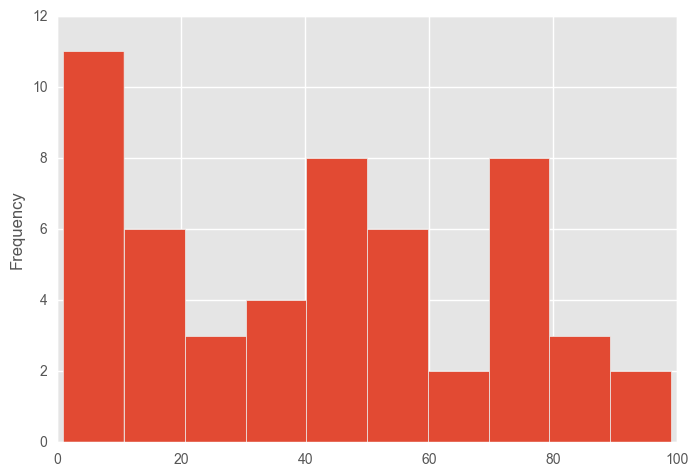

the skew is 0.112827923066 and the kurtosis is -1.21878016514


In [8]:
# First, lets have a look at the distribution and get some statistics about it..
# If its truly random, we would expect the distribution to be fairly random (though perhaps
# not since our sample size may be too low for this to manifest given our dynamic range...)

# set column to a variable
rand1 = df['Pick a number from 1 to 100']

# plot the histogram
fig = rand1.plot.hist() # declare figure, in this case, a histogram
plt.show()
# let's get some distribution statistics
print('the skew is %s and the kurtosis is %s'%(rand1.skew(),rand1.kurtosis()))



In [9]:
# We can test if the skew and kurtosis are different from that of a normal distribution

# Test the skewness:
print(stat.skewtest(rand1))

# Test the kurtosis
print(stat.kurtosistest(rand1))

SkewtestResult(statistic=0.36077759595722014, pvalue=0.71826571225616642)
KurtosistestResult(statistic=-3.717225125196546, pvalue=0.00020142294651471696)


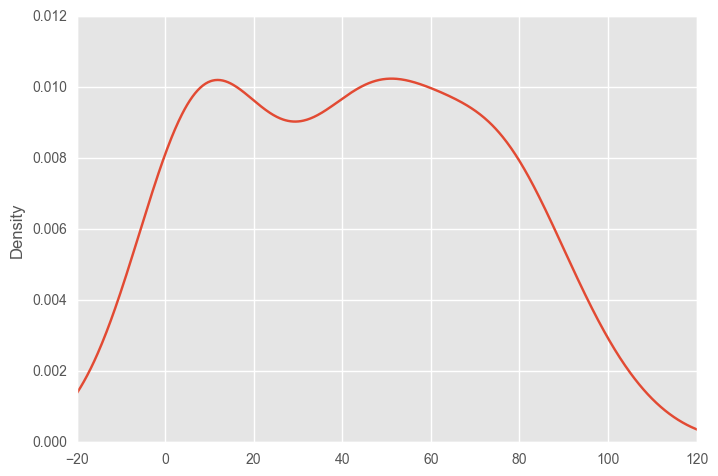

In [10]:
# Alright, so the skew is normal but the kurtosis is highly abnormal. This is easy to see
# if we print the shape of the historgramp
rand1.plot.kde()
plt.xlim(-20,120) # lets set the axes to where we want them...
plt.show()

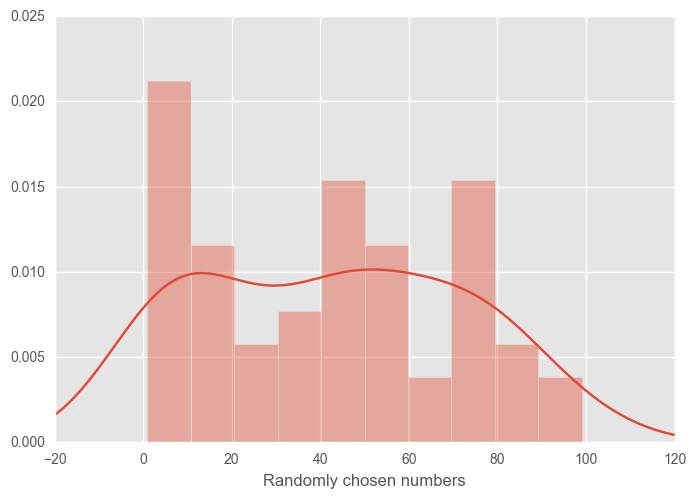

In [11]:
# alternatively, we can view them both on top of one another using seaborn
#plt.close()
sns.distplot(rand1.tolist(),bins=10,axlabel='Randomly chosen numbers')
plt.xlim(-20,120)
plt.show()
# Note that the x-xis changed is changed to a density measure rather than an absolute count


In [12]:
# Its clear to see the distribution curve is very wide and without an obvious peak

# We asked the survey-takers to input a random number later on in the survey. Lets have
# a look at how this variable compares to our first random # choice...

rand2 = df['Pick another number from 1 to 100']
print(rand2.head())

# However, when we look at the dtype of the object, we see it is an "object". In contrast,
# the dtype for rand1 is a float
print(rand1.head())
print('\nare rand1 and rand2 the same dtype? %s'%(rand1.dtype == rand2.dtype))

# If the column is an "object" instead of a float, it may mean that there is some sort of
# non-numeric value within the column that caused pandas to not recognize rand2 should be
# a column of floats.


0    54
1    87
2    26
3    88
4    34
Name: Pick another number from 1 to 100, dtype: object
0    48.0
1    17.0
2    56.0
3    47.0
4    69.0
Name: Pick a number from 1 to 100, dtype: float64

are rand1 and rand2 the same dtype? False


In [13]:
# Okay let's try to set the dtype of rand2 to float
rand2 = rand2.astype(float)

ValueError: could not convert string to float: 'Pi'

In [14]:
# That's a looooong error but the very end says what we need to know. There is a value called
# "Pi" within our column.. some joker typed Pi instead of a number! Just as we suspected..

# Lets use one of the functions we designed last lesson to have a look at where this occured.
bad_idx = us.purify_numbers(rand2,mode='evaluate')

value Pi at index 42 is not a number class


In [15]:
# Normally, we could use this same function to turn this into a NaN, but actually, pi *is* 
# a real number. So lets assume that's what the user wanted and replace that value.

from math import pi
df.loc['Pick another number from 1 to 100',bad_idx] = pi # Change it in the original df too...
rand2.iloc[bad_idx] = pi

print(rand2[bad_idx])

# Looks good, now lets try again to convert the column to a column of floats...
try:
    rand2 = rand2.astype(float)
    print('\nthe conversion worked! \n')
except:
    print('\nnope didn\'nt work \n')
          
print('dtype of rand2 is now %s, is it the same as rand1? %s'%(
                rand2.dtype,rand2.dtype == rand1.dtype))


42    3.14159
Name: Pick another number from 1 to 100, dtype: object

the conversion worked! 

dtype of rand2 is now float64, is it the same as rand1? True


//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


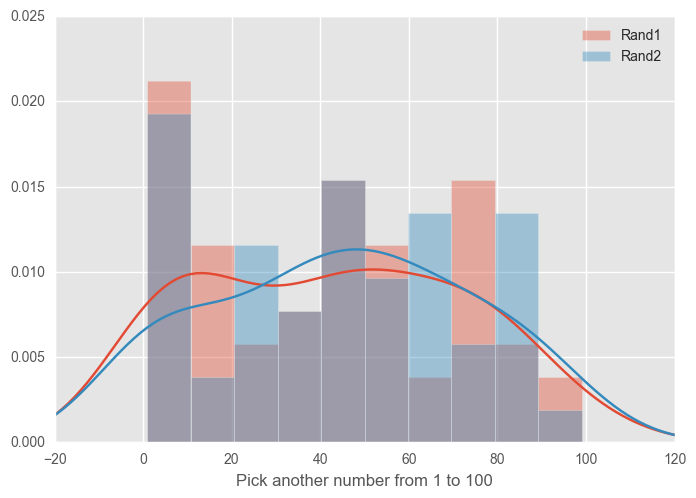

SkewtestResult(statistic=-0.072283241750128333, pvalue=0.94237650095326875)
KurtosistestResult(statistic=-2.7250506826382277, pvalue=0.0064291617109892571)


In [16]:
# Alright, now that we have that out of the way, lets have a look at an overlay 
# of the histogram for these two "random" variables using seaborn

# Plot 2 histograms, remove NaNs where appropriate
plt.close() # Close existing plots
sns.distplot(rand1.dropna(), bins=10, label='Rand1') # Hist 1
sns.distplot(rand2.dropna(), bins=10, label='Rand2') # Hist 2
plt.xlim(-20,120)
plt.legend() # Add a legend
plt.show() # Let's see it

# And lets test the normality of rand2 as well
print(stat.skewtest(rand2))
print(stat.kurtosistest(rand2))



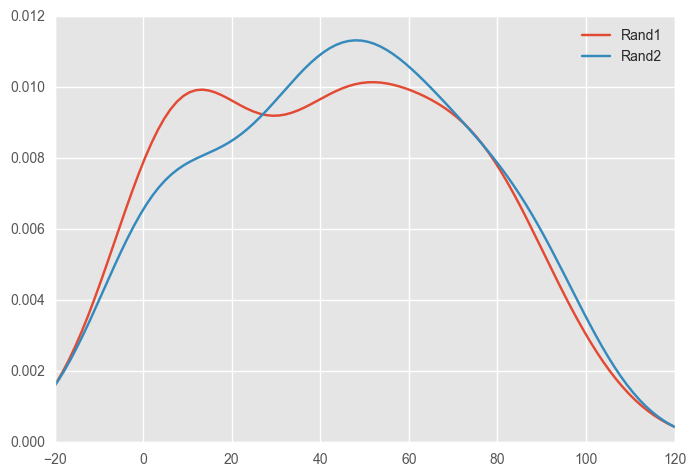

In [17]:
# Perhaps things will be a bit easier to visualize if we look at only the curves
plt.close()
sns.kdeplot(rand1.dropna(), label='Rand1')
sns.kdeplot(rand2.dropna(), label='Rand2')
plt.xlim(-20,120)
plt.legend()
plt.show() 

In [18]:
# Looks the same: normal skewness, non-normal kurtosis.
# Are these two "random" variables related to one another?
r,p = stat.pearsonr(rand1,rand2)
print('r is %s, p is %s'%(r,p))

r is 0.132190891639, p is 0.345391518954


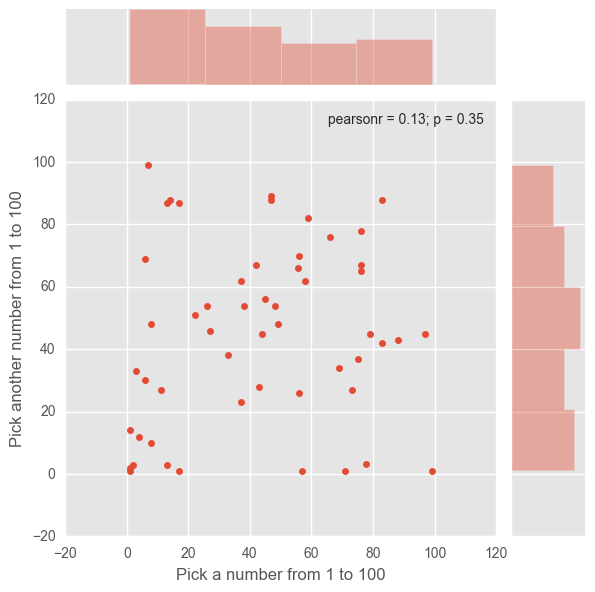

In [19]:
# Lets have a look using a nifty seaborn plot.  

plt.close() # close existing plot
sns.jointplot(rand1,rand2)
plt.show()

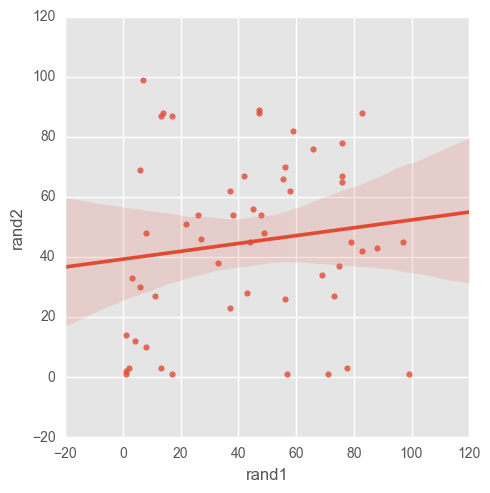

In [20]:
# A relationships is indeed hard to see. Lets use a different type of seaborn plot
# to see what direction the relationship is going (even though the relationships is not
# significant)

# Unlike the previous plot, we cannot just put in the variables we want. Instead, seaborn
# expects a dataframe and column names (this is very similar to R). So, lets construct a
# mini Dataframe, make the columns easier to deal with, and then make the plot.

plt.close() 
# make a mini dataframe
forplot = pandas.concat([rand1,rand2], # concatenate these two pandas Series'
                        axis=1, # concatenate so the columns are next to one another, not stacked
                        join_axes=[rand1.index]) # make the new index the index of rand 1
forplot.columns = ['rand1','rand2'] # change columns
sns.lmplot('rand1','rand2',forplot) # plot
plt.show()


In [21]:
# But wait! Didn't we discuss the fact that these variables are not normal! That means we can't
# use traditional parametric statistics. Lets use spearman's rank correlations instead...

rho, p = stat.spearmanr(rand1,rand2)
print('rho is %s, p is %s'%(rho,p))

rho is 0.153751478203, p is 0.271685840399


In [22]:
# Still not significant, though its a bit closer. Lets have a look at the data, though
# recall we'll have to rank the data first, since its a spearman's correlation
ranked_rand1 = pandas.Series(stat.rankdata(rand1,method='min')) # convert to Series...
ranked_rand2 = pandas.Series(stat.rankdata(rand2,method='min'))

print(ranked_rand1.head())
print(ranked_rand2.head())

# see the docstring to find out why I chose method = min
stat.rankdata?

0    31
1    16
2    34
3    29
4    40
dtype: int64
0    32
1    47
2    14
3    49
4    20
dtype: int64


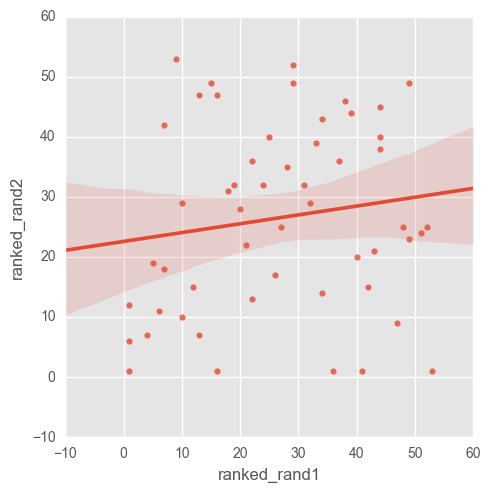

In [23]:
# And now we prepare the plot...
plt.close()
forplot_r = pandas.concat([ranked_rand1,ranked_rand2], axis=1, join_axes=[rand1.index])
forplot_r.columns = ['ranked_rand1','ranked_rand2'] # change columns
sns.lmplot('ranked_rand1','ranked_rand2',forplot_r) 
plt.show()


rand1 is blue, rand2 is red


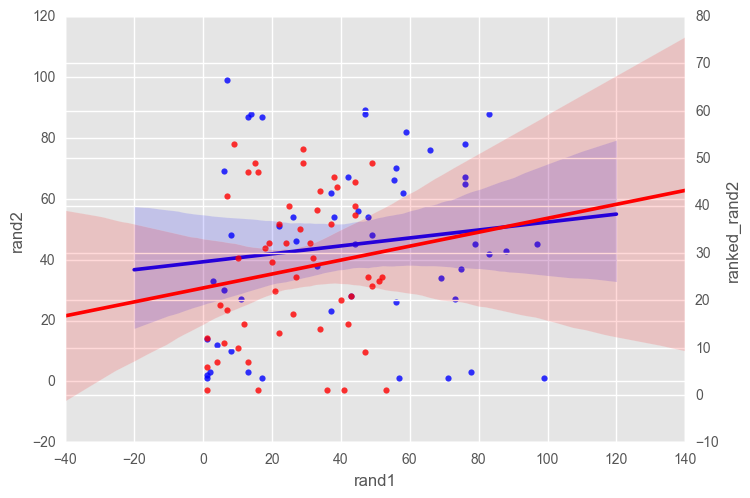

In [24]:
# It would be nice to overlay them.. Lets have a look!

print('rand1 is blue, rand2 is red')
plt.close()
fig, ax = plt.subplots()
sns.regplot('rand1','rand2',forplot,ax=ax,color='b',label='rand1')
ax2 = ax.twinx()
sns.regplot('ranked_rand1','ranked_rand2',forplot_r,ax=ax2,color='r',label='rand2')
plt.show()

In [ ]:
np.squeeze?

In [25]:
# I suppose thats cool, but the labeling is all weird. 
# We *could* mess around with attributes of ax1 and ax2 and use other matplotlib functions 
# to make this happend -- you can do almost anything with this library, though it takes some 
# getting used to.

# Instead, lets exploit the type of data structures seaborn expects to get the plot we want.
# We will stack the two mini-dataframes on top of one another and create a new column 
# describing which points are "ranked values" vs. which are not.

### PREPARE DF
# In order to merge these DFs, we need make sure their columns are the same
forplot_r.columns = forplot.columns

# and we need to change the indices to be unique
df_len = len(forplot.index)
forplot_r.index = range(df_len,df_len*2)


## MERGE DFs

for_2plot = pandas.concat([forplot,forplot_r]) # now we merge them
print(for_2plot.head(),'with shape', for_2plot.shape,'\n')


## MAKE NEW VARIABLE
for i in for_2plot.index: # iterate through the indices.
    if i < len(forplot): # if the index is in the first n, where n=length of first first df
        for_2plot.ix[i,'ranked?'] = 'Parametric' # set the value in the column "ranked?"
    else:
        for_2plot.ix[i,'ranked?'] = 'Non-parametric' # notice how we created the new column 
                                                     # within the for loop -- we did not have 
                                                     # to do it beforehand
for_2plot[50:60]

   rand1  rand2
0   48.0   54.0
1   17.0   87.0
2   56.0   26.0
3   47.0   88.0
4   69.0   34.0 with shape (106, 2) 



,rand1,rand2,ranked?
50,47.0,89.0,Parametric
51,6.0,30.0,Parametric
52,14.0,88.0,Parametric
53,31.0,32.0,Non-parametric
54,16.0,47.0,Non-parametric
55,34.0,14.0,Non-parametric
56,29.0,49.0,Non-parametric
57,40.0,20.0,Non-parametric
58,34.0,43.0,Non-parametric
59,10.0,10.0,Non-parametric


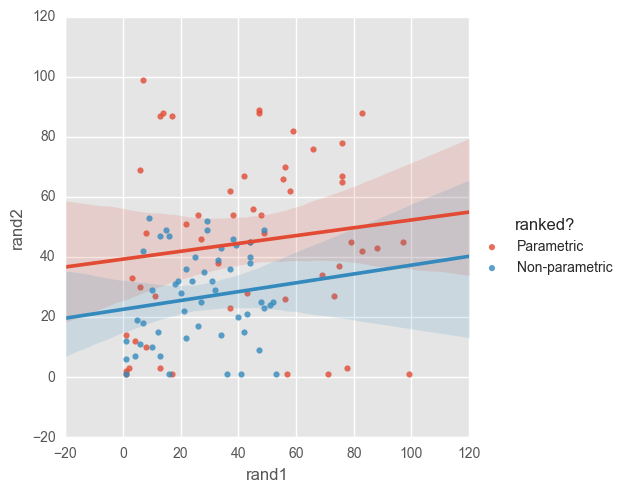

In [26]:
# Now lets try the merged plot again, but this time we can make use of a simple seaborn command
plt.close()
sns.lmplot(x='rand1',y='rand2',hue='ranked?',data=for_2plot)
plt.show()

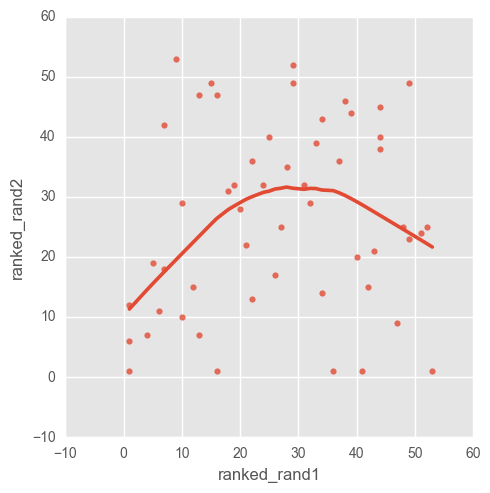

In [27]:
# That's a bit better, though there's not much to see there
# Sometimes it is a better to plot non-normal relationships using a lowess curve. This is very
# easy to do with our functions...:

# lets first return our column to the way they were so we don't get confused...
forplot_r.columns = ['ranked_rand1','ranked_rand2']

plt.close()
sns.lmplot('ranked_rand1','ranked_rand2',forplot_r,lowess=True)
plt.show()



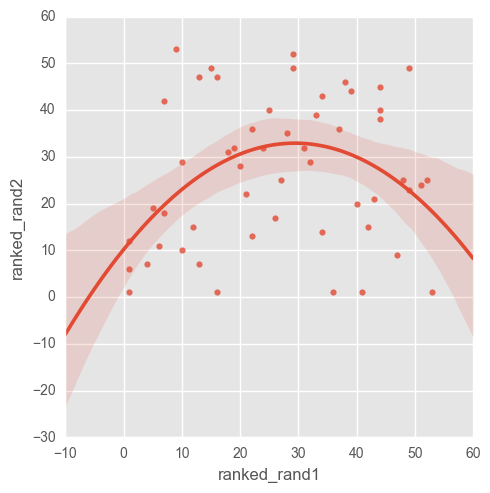

In [28]:
# The lowess curve revealed an interesting feature -- it seems there is a non-linear trend in
# the data. Lets plot it the best quadratic fit:

plt.close()
sns.lmplot('ranked_rand1','ranked_rand2',forplot_r,order=2) # setting order to 2 for 2nd order
                                                            # polynomial
plt.show()


In [29]:
# In case you're interested how that line is generated, I'll show you! Its a multi-step process:

# First we need to get the "predicted" quadratic curve. Numpy has a simple function that will 
# do the trick
fit = np.polyfit(ranked_rand1,ranked_rand2,2) # 2 here refers that we are searching for  
                                              # a fit to the data using a second order 
                                              # polynomial(i.e. parabolic relationship)
    
# now we save that into an equation we can use to transform y 
f = np.poly1d(fit) 
print(f,'\n')

# finally, we use apply that transform to get our "new" y
y_new = f(ranked_rand1)


          2
-0.02635 x + 1.549 x + 10.16 



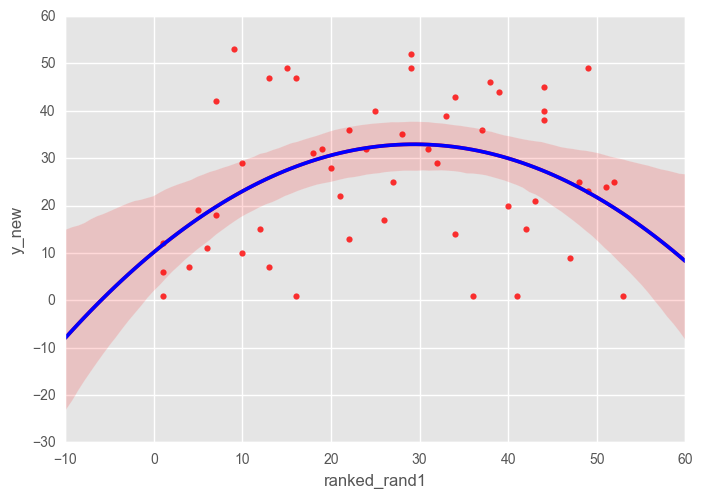

In [30]:
# plot it for a sanity check...

forplot_r['y_new'] = y_new # add 'y_new' to our mini-dataframe

plt.close()
fig, ax = plt.subplots() # initialize double-plot
sns.regplot('ranked_rand1','ranked_rand2',forplot_r,order=2,ax=ax,color='r') # the original plot
sns.regplot('ranked_rand1','y_new',forplot_r,order=2,ax=ax,color='b',marker=None) # now plot x against y_new
plt.show()



In [31]:
# we'll use still another method to check the fit of the model. This function performs linear
# regression for a pair of variables. We get the same r,p values as pearsonr, but we have more
# information, like standard error
slope,inter,tst_r,tst_p,stderr = stat.linregress(ranked_rand1,ranked_rand2**2)
print('r square is %s, p is %s, stderr is %s'%(tst_r**2,tst_p,stderr))

r square is 0.011874201709, p is 0.437332594458, stderr is 7.60854155281


In [ ]:
# Alas, looks can be decieving! Not even close to significant, despite the fancy quadratic 
# curve suggesting otherwise. Okay, fair enough, so maybe these "random" numbers are actually
# random, at least with respect to one another. There are other things we could do to delve
# further into this, but for now, let's move onto something else.

# But first, let's take a break and get our dataframe in order. Right now, many of our
# variables will be difficult to analyze. Let's fix that.

In [34]:
ndf = deepcopy(df)

In [425]:
# PURIFY INTS IN NUMBER LIKE COLUMNS

cols = ['How many romantic relationships have you been in that have lasted at least 6 months',
        'How many siblings do you have?',
        'How many cities have you lived in for at least six months',
        'Assuming you stayed relatively healthy but aged normally, how old would you want to live to be?',
        'Exactly how far in km is your commute to work?',
        'What are the chances (in percentage from 1-100) that the Dutch National team will win a EuroCup or WorldCup championship in the next 10 years?',
        'How many hours of sleep do you typically get on week days']
        
# Nothing fancy here. For each of the columns above, I'm using our self-made function to
# identify problematic cells and fix them manually. Still, notice for each cell it only takes
# me a few lines to do this. When you're comfortable with Python, it can be a lot faster than
# excel. Notice however that I'm also changing the dtype of the columns using astype -- this is 
# just to make sure Pandas recognizes these columns are full of numbers.
    
us.purify_numbers(df[cols[0]])
ndf.ix[25,cols[0]] = 2
ndf.ix[49,cols[0]] = 6
ndf[cols[0]] = us.purify_numbers(ndf[cols[0]],mode='apply').astype(float)
print('\n')

us.purify_numbers(df[cols[1]])
ndf.ix[36,cols[1]] = 1
ndf[cols[1]] = ndf[cols[1]].astype(float)
print('\n')

us.purify_numbers(df[cols[2]])
ndf.ix[25,cols[2]] = 4
ndf[cols[2]] = ndf[cols[2]].astype(float)
print('\n')

us.purify_numbers(df[cols[3]])
ndf.ix[[0,2,36],cols[3]] = 100
ndf[cols[3]] = us.purify_numbers(ndf[cols[3]],mode='apply').astype(float)
print('\n')

ndf[cols[4]] = df[cols[4]]
bad_indz = us.purify_numbers(df[cols[4]])
for ind in bad_indz:
    val = ndf.ix[ind,cols[4]]
    if 'k' in val:
        val = val.split('k')[0]
        if ',' in val:
            val = val.replace(',','.')
        ndf.ix[ind,cols[4]] = val
ndf[cols[4]] = us.purify_numbers(ndf[cols[4]],mode='apply').astype(float)
print('\n')

bad_indz = us.purify_numbers(df[cols[5]])
for i in bad_indz:
    ndf.ix[i,cols[5]] = ndf.ix[i,cols[5]]
ndf[cols[5]] = us.purify_numbers(ndf[cols[5]],mode='apply').astype(float)
print('\n')

bad_indz = us.purify_numbers(df[cols[6]])
ndf.ix[[13,23,37],cols[6]] = 7.5
ndf.ix[36,cols[6]] = 8.5
ndf[cols[6]] = us.purify_numbers(ndf[cols[6]],mode='apply').astype(float)

ndf['Pick another number from 1 to 100'] = rand2

value Some. at index 0 is not a number class
value Two at index 25 is not a number class
value This question is too personal, I cannot answer at index 47 is not a number class
value 6ish at index 49 is not a number class


value 1 biological ,2 "step" at index 36 is not a number class


value Four at index 25 is not a number class


value Exactly 100 years. at index 0 is not a number class
value 100+ at index 2 is not a number class
value in perpetuity at index 23 is not a number class
value Long enough at index 24 is not a number class
value INFINITE 100+ at index 26 is not a number class
value 💯 at index 36 is not a number class
value As old as you but not older. at index 41 is not a number class
value Immortal at index 42 is not a number class
value Infinite at index 43 is not a number class
value I'm superstitious, cannot answer that at index 47 is not a number class


value 3.5 km at index 4 is not a number class
value 7,3 at index 8 is not a number class
value 2,4km at index 9 is

In [36]:
# CONVERT LISTED OUTPUT TO NUMBERS

# For questions where users could select more than one answer, the Survey outputted cells with
# all answers where sep = ;. In one other column (languages), the users separated their
# answers into columns. I will use one of our functions to take these cells and instead
# output the number of answers or boxes they selected. Its not the coolest thing in the world
# but its another variable to look at.

# Because we need to do basically the same thing to each column, I can do this in only a few
# lines. Not that its important, in this case, that the labels are in the same order as the 
# columns, or else the script would give us false outputs.

labs = ['comp_exp','programmin_exp','img_software_exp','stats_exp',
        'food_pickiness','drink_flexibility','sandwich_flexibility',
       'languages']

cols = ['Please select all of the following for which you have some experience', 
        'If you have programming experience, list languages to you are comfortable with.',
        'If you have experience with image preprocessing software, please select which software ',
        'If you have experience with statistical analysis, what are your preferred statistical softwares, engines or languages?',
        'Do you strongly dislike the taste or texture of any of the following things?',
        'Which of these do you regularly drink?',
        'Which of these would you consider a sandwich?',
        'List the languages you speak (conversationally)']

for i,col in enumerate(cols): # For each of the columns above
    for ind,entry in enumerate(ndf[col]): # For each entry (list of answers) in that column 
        if i == 7:            # if its the 7th column in the list...
            sep = ','         # use a ',' as the delimiter
        else:                 # otherwise
            sep = ';'          # use a ';' as the delimiter
        # perform the operation
        val,z = us.handle_list(entry,sep=sep,len_only=True,verbose = False)
        # make new in ndf with output of handle_list, and call it by the ith label in labs
        # P.S. that's why the labels need to be in the same order
        ndf.ix[ind,labs[i]] = val 


In [39]:
# CLEAN UP A FEW OTHER VARIABLES

# Some other variable just need some specific TLC. I take care of them individually, usually
# with the help of scripts we made

ndf.drop(ndf.index[-1],axis=0,inplace=True)

ndf['Time of day'] = us.time_of_day(ndf['Timestamp'])

ndf['aggression'] = us.character_count(
        df['Fill this text box with gibberish by mashing random keyboard keys']).astype(float)

ndf['Uniqueness'],jnk = us.uniqueness(ndf['Name the first five animals you can think of'],
                                     seq=True,seq_target=5,score_bins=10)
ndf['Uniqueness'] = ndf['Uniqueness'].astype(float)

col = 'If you had to choose one, what would be your favorite type of beer?'
for i,v in enumerate(df[col]):
    if v == 'Amstel' or v == 'Tripel' or v == 'Triple, IPA, Pilsner':
        print(i,v)
ndf.ix[10,col] = 'Pilsner, Lager or Bock'
ndf.ix[17,col] = 'Hefeweizen or Belgian'
ndf.ix[17,col] = np.nan

col = 'What color is the shirt/dress/upper-body-clothing you\'re wearing right now, if any?'
ndf.ix[[1,41],col] = 'Other' 

ndf['programmin_exp'] = us.handle_NaNs(ndf['programmin_exp'],mode='encode',code=0.0)
ndf['food_pickiness'] = us.handle_NaNs(ndf['food_pickiness'],mode='encode',code=0.0)
#tstcols.remove('stats_exp')

value nan at row 53 is not a str, but a <class 'float'>. Skipping...
[  1.    2.6   4.2   5.8   7.4   9.   10.6  12.2  13.8  15.4  17. ]
index 8 had more than 5 words, removing final word Mouse
index 15 had more than 5 words, removing final word Tiger
index 36 had more than 5 words, removing final word 
index 44 had more than 5 words, removing final word degus
index 51 had more than 5 words, removing final word 
10 Amstel
16 Triple, IPA, Pilsner
17 Tripel
26 rows changed
37 rows changed


In [40]:
# Finally, we still have lots of columns that can't be easily analyzed without some thoughtful
# transformation. Let's isolate the testable variables into a separate list that we can refer
# to whenever we want.

# Since we're lazy, we'll try to think of a common thread that fits the variables we do or
# don't want to analyze. It turns out that all of the variables we DONT want to analyze have
# a dtype of "object" or "O" and have > 8 unique entries. Lets exploit that rule below

tstcols = []
for col in ndf.columns:
    if ndf[col].dtype == 'O' and len(ndf[col].unique()) > 8:
        continue
    else:
        tstcols.append(col)

        
# I'll only remove two others that still don't fit our criteria: 
tstcols.remove('stats_exp') # because all the values turned out to be the same
tstcols.remove(tstcols[0]) # This is just the index

# And here are the columns we're keeping!
tstcols



['Unnamed: 0',
 'What operating system do you most prefer?',
 'Were you born in the Netherlands?',
 'If you had to choose one, what would be your favorite type of beer?',
 'How spicy do you like your food?',
 'What are your thoughts on the oxford comma?',
 "What color is this dress? (If you're familiar with this image, what color did you think it was when you first saw it)",
 "When you adjust a thermostat that was set by someone else, it's usually because you want the room to be...",
 'How many romantic relationships have you been in that have lasted at least 6 months',
 'Pick a number from 1 to 100',
 'How many siblings do you have?',
 'Do you feel sleepy a lot?',
 'How many continents have you visited',
 'How many cities have you lived in for at least six months',
 'Do you have any food allergies or intolerances?',
 'Have you ever practiced any non-allergy based dietary restrictions (e.g. vegetarian, gluten-free, vegan, etc)',
 'How good do you think you are a driving (3 is average)'

In [ ]:
#### DEMONSTRATION 2: A CULTURAL EXPERIMENT ####

'''Here, we will look at how individuals born in the Netherlands differ from those born 
elsewhere. We will go over simple t-tests, as well as chi-square test, and how to visualize
such associations. We will also touch on multiple comparisons'''

In [ ]:
# I don't know about you, but I'm interested to know if people in the Netherlands that took the
# survey differ at all from those not born in the Netherlands.

# To look at this, we will survey all of the variables in tstcols to see if there are any 
# associations. 

# PLEASE NOTE: This is <<NOT>> how to do science!! Data-mining and exploratory
# analyses have their place in science, but what we're about to do is called a fishing 
# expedition and its GREATLY frowned upon because it often leads to the publication of results
# that are not replicable, therefore often wasting precious time and energy for the scientific
# community.

# The reason we are doing it here is just to find some significant associations to showcase
# some of the statistical and visualization tools Python has to offer. However, just to be on
# the right side of things, we will be sure to correct our results for multiple comparisons.

In [105]:
# Now that that disclaimer is out of the way, I'll unveil a little script I wrote to find
# significant associations in a quick and very dirty way. You can read the documentation to
# understand what it does, and look at the source code in pycourse_lesson3_4_scripts if you
# want to know how it works. You can use this script for your project, but please use it and 
# other such methods wisely for applications outside of this class.

NL = 'Were you born in the Netherlands?'

# This script will notify us about significant relationships between the column above and other
# variables in our dataset
NL_ps = us.data_miner(xcols=[NL],ycols=tstcols,data=ndf,return_ps=True)

working on Were you born in the Netherlands?
** Were you born in the Netherlands?    vs   How many continents have you visited tf -2.69109439981 0.00960621145871 **
** Were you born in the Netherlands?    vs   How many cities have you lived in for at least six months tf 2.88292342048 0.00575494863616 **
* Were you born in the Netherlands?    vs   What style of music do you most prefer? 73.4523809524 chi 0.0266734721483 *


In [106]:
# Very interesting!! It looks like there's an interesting relationship between being from the
# Netherlands and travel! 

# Those are some nice p-values, but they may not be enough to survive multiple comparisons 
# tests, since we tested so many variables. The most conservative method for correcting for
# multiple comparisons is the Bonferonni method, where you just divide your alpha level 
# (often 0.05) by the number of comparisons. Lets do that here

0.05/len(tstcols)

0.0011363636363636365

In [112]:
# Its plain to see that none of our significant relationships survive that threshold, but if
# that was not so clear, we could always check. 

# The p-values for each relationship has been stored in a DataFrame called NL_ps. 

print(NL_ps.head(),'\n')


                                                           p
(What color is this dress? (If you're familiar ...  0.853448
(sandwich_flexibility, Were you born in the Net...  0.143033
(Do you usually remember your dreams?, Were you...  1.000000
(When you adjust a thermostat that was set by s...  0.999995
(comp_exp, Were you born in the Netherlands?)       0.664854 



In [113]:
# Lets search it just to make sure

for relationship,row in NL_ps.iterrows():
    if row[0] < (0.05/len(tstcols)):
        print(relationship)

In [115]:
# Nothing. However, there are other less severe methods for multiple comparisons corrections.
# The false discovery rate (FDR) is a more relaxed method that lets researchers "tolerate" some
# False discoveries, as long as they can control the expected rate. Its also great for
# non-independent sets of tests (not the case here, but often the case in neuroimaging).

# See here for a short, fairly simple and very nice explanation: 
# https://brainder.org/2011/09/05/fdr-corrected-fdr-adjusted-p-values/

# It would be fun to do FDR by hand, but we can save that for another day. Luckily, the 
# statsmodels library has an FDR correction function, though its a bit hard to find. Lets 
# import it directly into our namespace and look at its docstring.

from statsmodels.sandbox.stats.multicomp import fdrcorrection0 as fdr
fdr?

In [119]:
# Lets enter all of our pvalues into the FDR function with a Q of 0.1 and see what we get...

# Get rid of NaNs (fdr can't handle them) and convert to a list
pvals = NL_ps['p'].dropna().tolist()

NL_fdr = fdr(pvals,alpha=0.1,method='indep')

In [120]:
# Now we'll print the output. The first array list True for any variable that survives FDR 
# correction at this alpha level (Q), while the second array lists what Q would need to be set 
# to for the variable to survive FDR
NL_fdr

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False], dtype=bool),
 array([ 1.        ,  0.75092128,  1.        ,  1.        ,  1.        ,
         0.75092128,  1.        ,  1.        ,  1.        ,  0.75092128,
         1.        ,  1.        ,  0.75092128,  1.        ,  0.75092128,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         0.84150202,  1.        ,  0.37342861,  0.20173044,  1.        ,
         1.        ,  0.84150202,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  0.20173044,  1.        ,  0.91864067,
         1.        ,  1.        ]))

In [ ]:
# Sorry folks, are sample just isn't big enough for these relationships to be taken at face
# value. Let's take a look at some of the trending relationships anyway, but just keep in mind
# the data is not reliable.

# By the way, you can get the same functionality as above with Bonferonni (FWE) correction
# using the FWE method:

# from statsmodels.sandbox.stats.multicomp.multipletests

# Other methods can be found there as well.

In [151]:
# It seems the Dutch have some interesting relationships with travel! 
# Let's have a look at that. 

# First, lets make a mini-df of only the variables we care about

adf = deepcopy(ndf)
x = 'Were you born in the Netherlands?'
y1 = 'How many continents have you visited'
y2 = 'How many cities have you lived in for at least six months'
y3 = 'What style of music do you most prefer?'

NL_df = pandas.concat([adf[x],adf[y1],adf[y2],adf[y3]],axis=1)
NL_df.head()
                       

,Were you born in the Netherlands?,How many continents have you visited,How many cities have you lived in for at least six months,What style of music do you most prefer?
0,No,2.0,5.0,Alternative/Indie
1,No,2.0,6.0,Rock
2,No,1.0,3.0,Rock
3,Yes,3.0,4.0,Pop
4,No,4.0,5.0,Rock


In [152]:
# Now, lets make sure pandas knows which of these variables are "categorical"
NL_df[x] = NL_df[x].astype('category')
NL_df[y3] = NL_df[y3].astype('category')

In [153]:
# After those simple and fairly painless steps, the data can be easily explored and plotted.
# Lets make a few pivot tables so we can look at the means visually.
print(NL_df.pivot_table(y1,x))
print('\n')
print(NL_df.pivot_table(y2,x))
print('\n')

# For two categorical variables, we'll use the crosstab function
pandas.crosstab(NL_df[x],NL_df[y3])

Were you born in the Netherlands?
No     2.72973
Yes    3.62500
Name: How many continents have you visited, dtype: float64


Were you born in the Netherlands?
No     3.648649
Yes    2.500000
Name: How many cities have you lived in for at least six months, dtype: float64




What style of music do you most prefer?,Alternative/Indie,Classical/Jazz,Country/Folk,Electronic,Hip-Hop,Pop,Rock
Were you born in the Netherlands?,,,,,,,
No,14,3,2,0,7,3,8
Yes,3,3,0,1,2,5,2


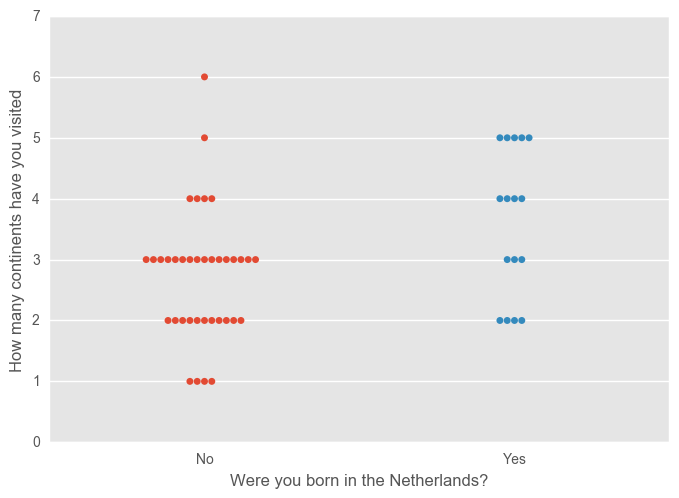

In [165]:
# Don't worry, we'll come back to the categorical stuff. Lets stick to the other two variables
# for a moment. It seems like the Dutch are more likely to have visited multiple continents,
# but tend to live in less cities.

#Let's plot these relationships -- again, very easy now that the data is 
# prepared the way we need

plt.close()
sns.swarmplot(x,y1,data=NL_df)
plt.show()

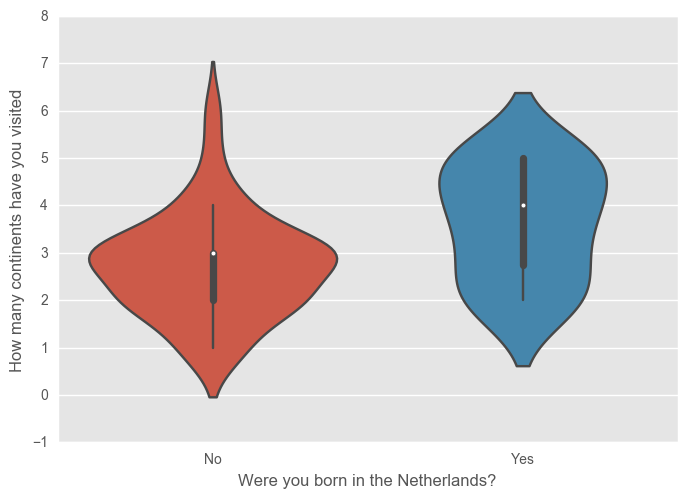

In [167]:
# I like this type of plot because you can easily see all of the datapoints, so the n of each
# group is clear. Some might prefer a similar plot, called a violin plot, which is a bit
# easier to see the nature of a relationship

plt.close()
sns.violinplot(x, y1, data=NL_df)
plt.show()

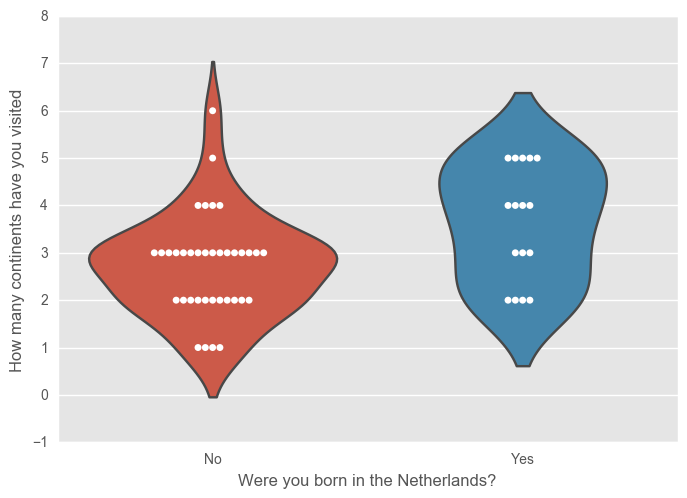

In [169]:
# Very pretty! They look like stingrays! (pijlstaartrog?)
# We can also combine these two plots (we'll remove the inner part of the violin plot so we
# can see the points better), and we'll change the color of the points as well

plt.close()
sns.violinplot(x, y1, data=NL_df,inner=None)
sns.swarmplot(x,y1,data=NL_df,color='w')
plt.show()

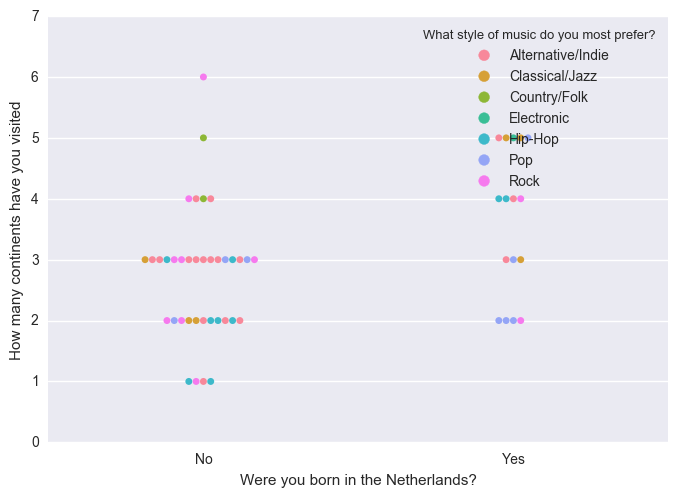

In [193]:
# These types of plots can be useful if you want to visualize a three-way interaction with
# two categorical variables. You can add a third variable represented by color:

plt.close()
sns.swarmplot(x,y1,data=NL_df,hue=y3)
plt.show()

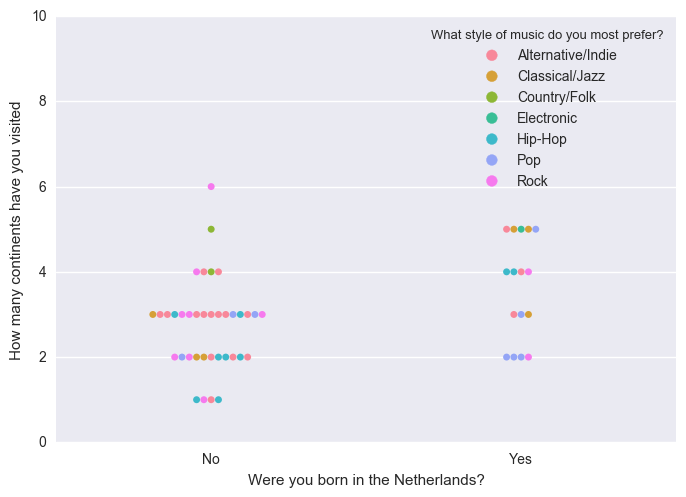

In [194]:
# Whoops, the labes are all messed up. Not a big deal, its not so hard to control the plots.
# We *could* actually control every aspect of those labels, including their position and size.
# For now, lets settle for making the y-axis bigger -- its a crappy work around but we have 
# other fish to fry

sns.swarmplot(x,y1,data=NL_df,hue=y3)
sns.plt.ylim([0,10]) # change the limits of y-axis to 0 and 10
plt.show()

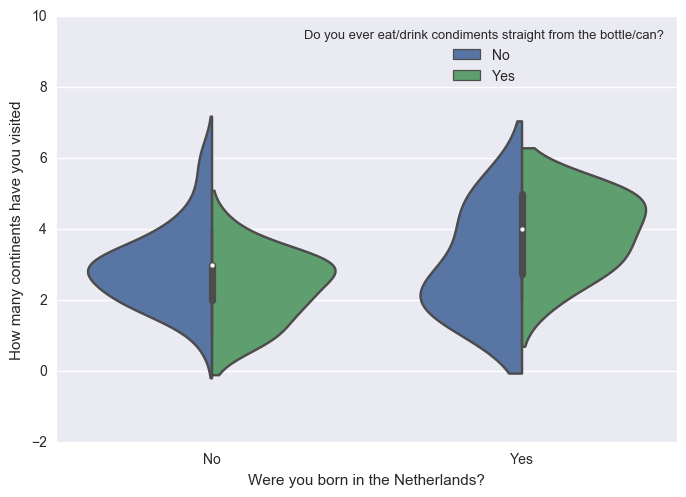

In [204]:
# If we wanted to get *really* fancy, and we have, for example, a three-way relationshpi
# between two binary variables and a third scalar variable, we could do this do better
# visualize the distributions:

# Add another binary variable
z = 'Do you ever eat/drink condiments straight from the bottle/can?'
NL_df[z] = ndf[z].astype('category')

# Plot 
plt.close()
sns.violinplot(x, y1, data=NL_df,hue=z,split=True)
sns.plt.ylim([-2,10])
plt.show()

# By the way, if you don't like these colors, you can mess around with them by setting the
# palette argument to a different set, like palette = 'Set3'

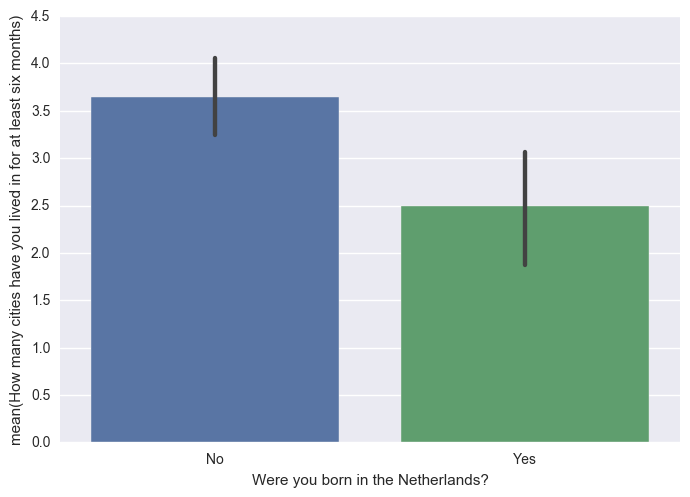

In [205]:
# Okay, now lets have a look at barplots. Let's look at the other variable instead. Again, its
# very easy with seaborn..

sns.barplot(x,y2,data=NL_df)
plt.show()

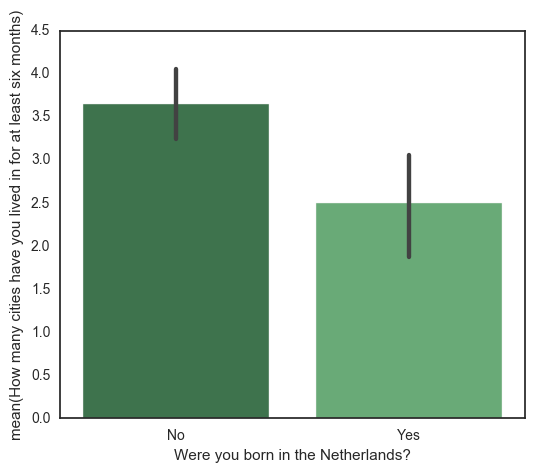

In [212]:
# Cool! Lets change the palette to something a bit nicer, make the graph a bit smaller,
# and lets change the background to a different style. 

# We'll use the "with" syntax to do that, which you haven't encountered before. It allows you
# to make temporary a change that would otherwise be applied reversably.

sns.set_style("white")
sns.plt.figure(figsize=(6,5))
sns.barplot(x,y2,data=NL_df,palette='Greens_d')
plt.show()
    

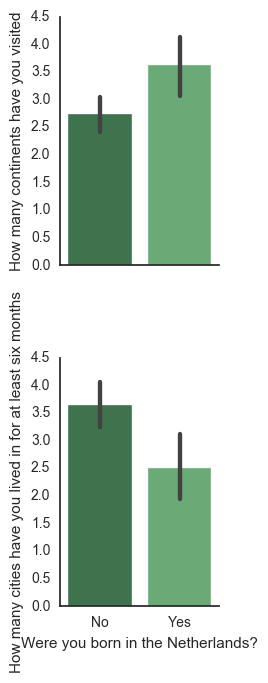

In [216]:
# Lets look at our two plots together
plt.close()
bothplots = sns.PairGrid(NL_df,
                 x_vars=[x],
                 y_vars=[y1,y2],
                 aspect=.75, size=3.5)
bothplots.map(sns.barplot, palette="Greens_d")
plt.show()

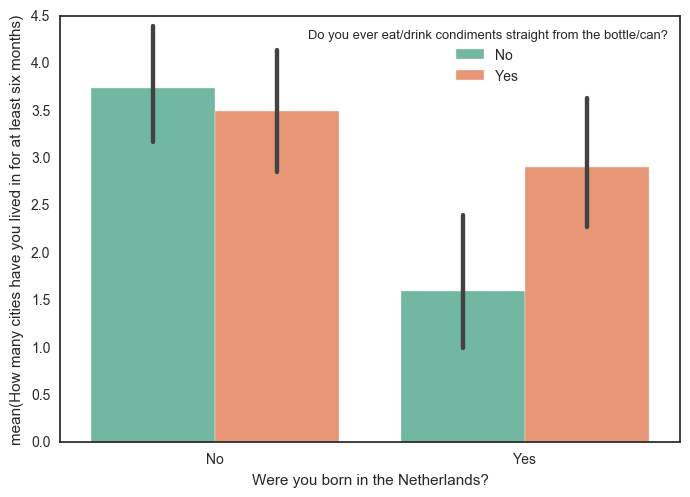

In [224]:
# Again, its easy to add multiple variables to the boxplots with the hue argument:
plt.close()
sns.barplot(x,y2,data=NL_df,hue=z,palette="Set2")
plt.show()

In [225]:
# Okay, enough visualization. Lets look at how to test some of these relationships.
# The scipy.stats library has many simple-to-run statistical tests, so of course it has a
# t-test function as well. Actually -- it has four different t-tests. We want to a run an 
# independent samples t-test in this case

stat.ttest_ind?

In [227]:
# In order to do this comfortably, we need to know whether there is a legitimate equality of
# variances between our populations. If not, we'll want to use the Welch's t-test as the 
# docstring explains. A simple google search reveals that a Levene's and Bartlett's tests 
# exist for this purpose. Sure enough, that stats module contains both. A Levene's test is more
# appropriate in the case of non-normal distributions. How normal are our variables?

print(stat.skewtest(NL_df[y1]))
print(stat.kurtosistest(NL_df[y1]))
print(stat.skewtest(NL_df[y2]))
print(stat.kurtosistest(NL_df[y1]))


SkewtestResult(statistic=1.3736858125901181, pvalue=0.16953924325722269)
KurtosistestResult(statistic=-0.16065985963960649, pvalue=0.87236130602302753)
SkewtestResult(statistic=0.47239913838623693, pvalue=0.63664191925049385)
KurtosistestResult(statistic=-0.16065985963960649, pvalue=0.87236130602302753)


In [228]:
# Looks like the distributions are normal. Let's use a Bartlett's test then.

stat.bartlett?

In [232]:
# Notice the input arguments are not exactly set up in a way that is easy for us. Arguments a 
# and b represent the two "populations" we are studying. That means we need to input separate 
# arrays for subjects who were born in the Netherlands, and subjects who were not. 
# Unfortunately, t-tests are set up this way as well.

# Lucky for us, we know how to use pandas for querying, which will make this very easy
# For example, here, I'll grab only rows for columns where born in Netherlands is Yes, and
# from that, I'll take only the column corresponding to # of continents lived in
NL_df[NL_df[x] == 'Yes'][y1]


3     3.0
5     5.0
6     5.0
7     2.0
8     2.0
9     3.0
10    2.0
11    2.0
13    5.0
14    4.0
15    3.0
16    4.0
17    5.0
18    5.0
19    4.0
20    4.0
Name: How many continents have you visited, dtype: float64

In [234]:
# Easy! Now lets set our variables:
a1 = NL_df[NL_df[x] == 'Yes'][y1]
b1 = NL_df[NL_df[x] == 'No'][y1]

a2 = NL_df[NL_df[x] == 'Yes'][y2]
b2 = NL_df[NL_df[x] == 'No'][y2]

# And run the test
print(stat.bartlett(a1,b1))
print(stat.bartlett(a2,b2))

BartlettResult(statistic=0.29228097799015329, pvalue=0.58876252021202868)
BartlettResult(statistic=0.10302781757736389, pvalue=0.74822595201223918)


In [235]:
# Looking good. Let's run the ttests then (know need for the Welch's!)
print(stat.ttest_ind(a1,b1))
print(stat.ttest_ind(a2,b2))

Ttest_indResult(statistic=2.6910943998113002, pvalue=0.0096062114587147397)
Ttest_indResult(statistic=-2.8829234204840439, pvalue=0.0057549486361554774)


In [238]:
# Lets go back and have a look at our categorical variable where we found the other
# significant association:

NL_ct = pandas.crosstab(NL_df[x],NL_df[y3])
NL_ct

What style of music do you most prefer?,Alternative/Indie,Classical/Jazz,Country/Folk,Electronic,Hip-Hop,Pop,Rock
Were you born in the Netherlands?,,,,,,,
No,14,3,2,0,7,3,8
Yes,3,3,0,1,2,5,2


In [282]:
# Its a bit hard to interpret this as sums. Lets convert it to percentages
# The quickest way to do this is transpose the crosstabs and calculate the percentages by hand

t_NL_ct = NL_ct.transpose()
colsum=jnk.sum(axis=0)
perc_NL_ct=jnk/colsum
perc_NL_ct

Were you born in the Netherlands?,No,Yes
What style of music do you most prefer?,,
Alternative/Indie,0.378378,0.1875
Classical/Jazz,0.081081,0.1875
Country/Folk,0.054054,0.0000
Electronic,0.000000,0.0625
Hip-Hop,0.189189,0.1250
Pop,0.081081,0.3125
Rock,0.216216,0.1250


In [268]:
# We can already sort of see the differences in the distributions. NLers have a pretty eclectic
# taste with the most popular music being, well, pop music. Others seem to be mostly into Rock,
# Hip-Hop and, particular, Alternative/Indie.

# We can already conclude from this that the Dutch have bad taste in music, but lets first test
# this association for statistical significance. We can use a chi-square test for this purpose

stat.chisquare?

In [275]:
# Running it is pretty easy. But the test won't take string as input. Instead, we'll need to
# give the categories integer values. Luckily we built a function to do this.

x_enc = us.encode(NL_df[x].astype('O')) # this won't work with an object of type "category"
y3_enc = us.encode(NL_df[y3].astype('O')) # hence the astype('O')
x_enc.head(),y3_enc.head()


#stat.chisquare(NL_df[x],NL_df[y3])

(0    1
 1    1
 2    1
 3    2
 4    1
 Name: Were you born in the Netherlands?, dtype: object, 0    1
 1    2
 2    2
 3    3
 4    2
 Name: What style of music do you most prefer?, dtype: object)

In [277]:
# And now we run the test
stat.chisquare(x_enc,y3_enc)

Power_divergenceResult(statistic=73.45238095238096, pvalue=0.02667347214830583)

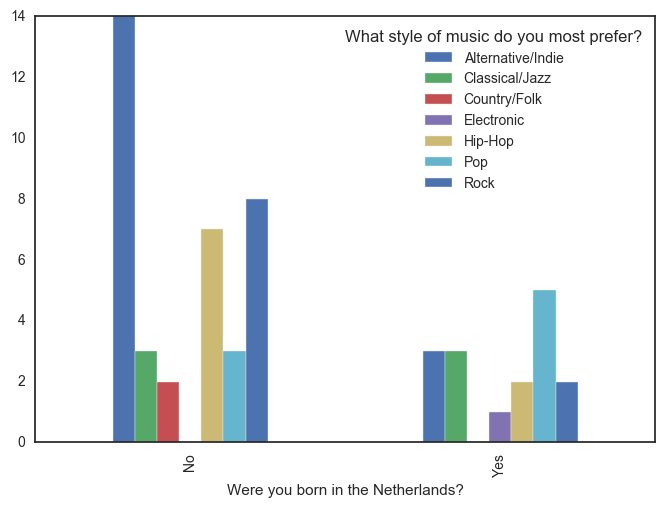

In [280]:
# Visualizing such relationships can be tricky. Pandas has a built-in plot function that
# does it. We can print directly from our crosstab we created

plt.close()
NL_ct.plot.bar()
plt.show()

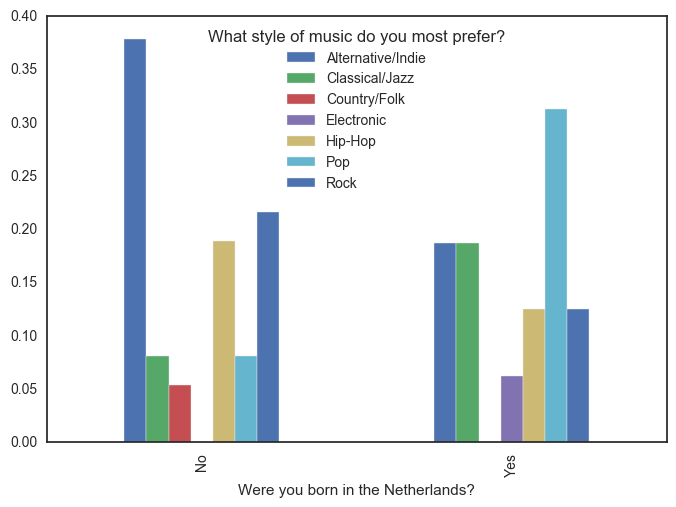

In [286]:
# This will be much easier to interpret with percentages. Let's take the percentage crosstabs
# we made before, transpose it, and plot it in the same manner
plt.close()
perc_NL_ct.transpose().plot.bar()
plt.show()

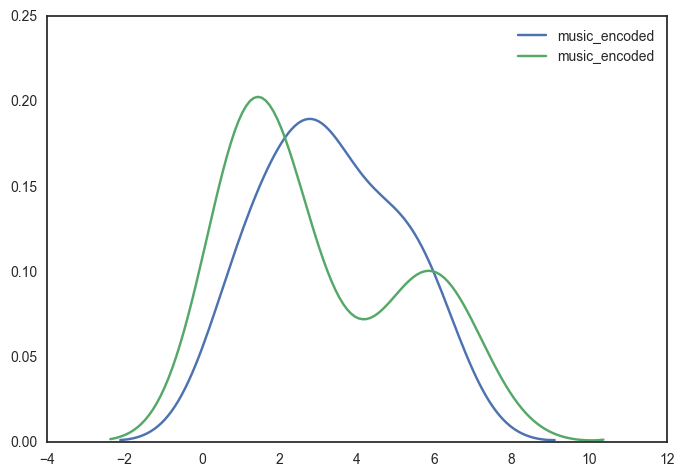

In [292]:
# One final (and I think super cool) way to visualize these relationships is to just look at
# the raw distributions overlaid over one another. We'll use the KDE plots from before to do
# this, and we'll use the encoded versions of the variables.

# We'll also have to wrangle the data in a similar way that we did with the t-tests, since we
# want to look at the distributions of the NL+ and NL- separately.

NL_df['music_encoded'] = y3_enc
a3 = NL_df[NL_df[x]=='Yes']['music_encoded']
b3 = NL_df[NL_df[x]=='No']['music_encoded']

plt.close()
sns.kdeplot(a3)
sns.kdeplot(b3)
plt.show()

In [309]:
# Frankly, I'm a bit surprised this is significant. I wonder how many times such a significant
# relationship would occur by chance if we kept the number of Dutch and non-Dutch the same.
# We can test this easily in Python using permutation. Here, we'll combine familiar Python 
# syntax with our newfangled statistical abilities.

# In other words, we can randomly shuffle our x value 10000 times, but keeping the number of
# "Yes" and "No" values the same. Then we can  test the presence of a relationship with 
# music preference in each of these random samples, and see the probability that the
# relationship we observed would happen just out of sheer chance!

# All we need to do create a for loop where, inside, we generate a random permutation of our x
# data, and then perform the a chi square test and store the outputs

tst_chi,tst_p = stat.chisquare(x_enc,y3_enc)

null_dist = []
for i in range(10000):
    rsamp = np.random.permutation(x_enc)
    chi,p = stat.chisquare(rsamp,y3_enc)
    null_dist.append(chi)


In [310]:
# Now we can see where our test value falls within the null distribution...
# There are many ways to do this. This isnt a very efficient way but its easy to follow.
# For each value in rs, if the lower (i.e. "stronger") is higher than our observed test
# statistic, we store it. At the end, we find the p-value by finding the ratio of value g
# greater than our test statistic vs. the total sample of 10000 tests.

cont = []
for r_chi in sorted(null_dist):
    if r_chi < tst_chi:
        cont.append(r_chi)
exact_p = len(cont)/float((len(null_dist)+1))
print(exact_p)

0.08869113088691132


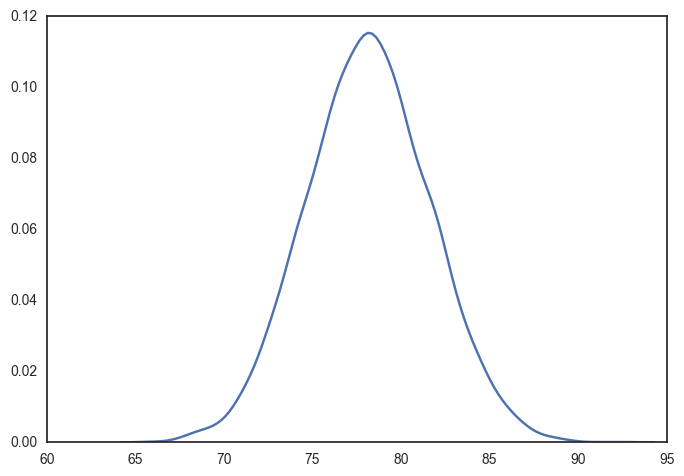

In [316]:
# Now that we're testing against a "true" null distribution, the association has fallen to
# trend levels. Lets visualize this!

# First we'll plot our null distribution
plt.close()
sns.kdeplot(np.array(null_dist))
plt.show()

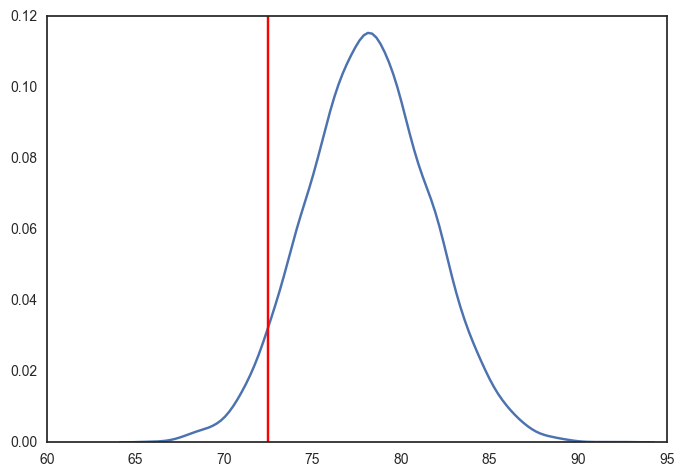

In [318]:
# A beautiful, normal null distribution! Now lets look at where in the distribution a chi
# statistic would have to fall to be considered significant in a one-sided test

# Find out the chi stat at 0.05:
sig_chi = sorted(null_dist)[-9500]

# Plot it over the distribution
sns.kdeplot(np.array(null_dist))
sns.plt.axvline(sig_chi,color='r')
plt.show()

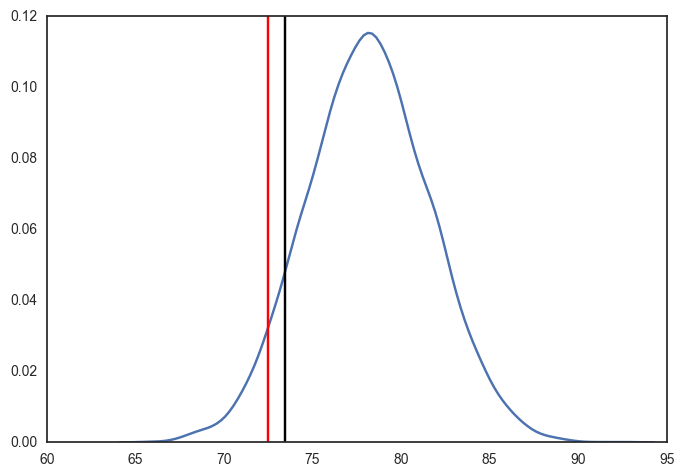

In [321]:
# And finally, lets add our actual observed test_statistic:

plt.close()
sns.kdeplot(np.array(null_dist))
sns.plt.axvline(sig_chi,color='r')
sns.plt.axvline(tst_chi,color='k')
plt.show()

In [ ]:
# I guess we don't have statistical proof that the Dutch have bad taste in music ;-)

In [ ]:
### DEMONSTRATION 3: AN INTERACTIVE CULTURAL EXPERIMENT    

'''Blah'''

In [ ]:
# Until now, I've shown you some pretty nice visualization techniques and a few nice tools like
# FDR correction and permutation. However, the stats I've shown you have been quite basic, and
# probably unhelpful for all but the simplest of statistical scenarios. Scipy.stats has many
# other higher level tools, but ultimately, you're going to want something with more thorough
# output and greater control if you're going to use Python for more in-depth analyses. 

# Statsmodels is a library that fits this profile. Its has a very impressive arsenal of
# statistical tests, including everything scipy has and many more specific and modern 
# techniques. Also, it has a function that lets it behave almost exactly like R, with identical
# output and ostensibly similar implementation.

# Lets have a look at this implementation so folks coming from R can feel a bit more
# comfortable

import statsmodels.formula.api as smf

In [420]:
# For those not familiar with r, the formula api from stats models lets users enter an actual
# equation (in certain format), such as a regression equations, and fit a model based on the 
# equations. The equation is written in string, and will work under the following
# circumstances:
# 1) The equation makes sense
# 2) Variables in the equation correspond directly to column names in your dataframe
# 3) Those variables/column names are understandable to the function -- so for example, it gets
#    confused by ?s
# 4) The columns of your dataframe that are called by the equation may need to be of a number 
#    dtype, depending on their position in the equation.

# Full full those conditions, and making, for example a GLM or mixed model, is quite easy. And
# the output is fantastic.

# Let's go back to investigating the Dutch using some multivariate GLMs. We'll use an ordinary
# least squares procedure that is nearly identical to Rs "lm" function

In [423]:
rdf = deepcopy(df)

In [429]:
# First, the statsmodel formula api to reproduce an association we've already seen. To do that,
# lets set up a dataframe of our variables of interest and make sure everything is set so that
# the formula won't error

# First, lets gather our variables into a dataframe
cols = ['Were you born in the Netherlands?',
        'How spicy do you like your food?',
        'How many continents have you visited',
        'How good are you at sports?',
        'How many romantic relationships have you been in that have lasted at least 6 months',
        'languages']

mv_df = deepcopy(ndf[cols])
mv_df.head()

,Were you born in the Netherlands?,How spicy do you like your food?,How many continents have you visited,How good are you at sports?,How many romantic relationships have you been in that have lasted at least 6 months,languages
0,No,4.0,2.0,4.0,NaN,4.0
1,No,4.0,2.0,3.0,1.0,3.0
2,No,4.0,1.0,1.0,1.0,2.0
3,Yes,3.0,3.0,1.0,1.0,3.0
4,No,4.0,4.0,3.0,3.0,1.0


In [427]:
# Now lets check our dtypes to make sure they're all floats
mv_df.dtypes

Were you born in the Netherlands?                                                       object
How spicy do you like your food?                                                       float64
How many continents have you visited                                                   float64
How good are you at sports?                                                            float64
How many romantic relationships have you been in that have lasted at least 6 months    float64
languages                                                                              float64
dtype: object

In [430]:
# Only the NL question is of the object type. In this case, we don't need to, but let's fix 
# this anyway by creating a new columns where this variable is encoded
mv_df['NL_encoded'] = us.encode(mv_df[mv_df.columns[0]]).astype(float)

mv_df.dtypes

Were you born in the Netherlands?                                                       object
How spicy do you like your food?                                                       float64
How many continents have you visited                                                   float64
How good are you at sports?                                                            float64
How many romantic relationships have you been in that have lasted at least 6 months    float64
languages                                                                              float64
NL_encoded                                                                             float64
dtype: object

In [431]:
# Finally, lets change our columns to be more equation-friendly
newcols = ['NLer','spiciness','continents','sports',
           'relationships','languages','NL_encoded']
mv_df.columns = newcols
mv_df.head()

,NLer,spiciness,continents,sports,relationships,languages,NL_encoded
0,No,4.0,2.0,4.0,NaN,4.0,1.0
1,No,4.0,2.0,3.0,1.0,3.0,1.0
2,No,4.0,1.0,1.0,1.0,2.0,1.0
3,Yes,3.0,3.0,1.0,1.0,3.0,2.0
4,No,4.0,4.0,3.0,3.0,1.0,1.0


In [432]:
# Now we're ready to do some analysis. Let's replicate an effect we found before using 
# statsmodels

# We'll use the ols function, which stands for ordinary least squares. Statsmodels have many
# other functions that work similarly to R, such as Logits, mixed models, and so forth. You can
# explore then if you want. We'll keep it simple for now.

model1 = smf.ols('continents ~ NLer',data=mv_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             continents   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     7.242
Date:                Mon, 17 Apr 2017   Prob (F-statistic):            0.00961
Time:                        01:02:51   Log-Likelihood:                -79.804
No. Observations:                  53   AIC:                             163.6
Df Residuals:                      51   BIC:                             167.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.7297      0.183     14.934      0.000       2.363       3.097
NLer[T.Yes]     0.8953      0.333      2.691      0.010       0.227       1.563
==============================================================================
Omnibus:                        1.870   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.393   Jarque-Bera (JB):                1.271
Skew:                           0.371   Prob(JB):                        0.530
Kurtosis:                       3.156   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [433]:
# Pretty impressive output isn't it! Here we have a lot more useful information.
# You'll also notice that he p-value for the whole model, which is listed as Prob (F-statistic)
# is identical to the results of the t-test we ran previously.

# Whats also really cool is that this model variable we created now contains tons of 
# information in it that can be used for other things. Have a look:
model1.

In [435]:
# This can be useful if you just want to extract, for example, the paramaters or the
# residuals
m1_params = model1.params
m1_resids = model1.resid
print(m1_params)
print('\n')
print(m1_resids.head())

Intercept      2.72973
NLer[T.Yes]    0.89527
dtype: float64


0   -0.72973
1   -0.72973
2   -1.72973
3   -0.62500
4    1.27027
dtype: float64


In [436]:
# You'll notice that these outputs are familiar. Have a look at the type!
type(m1_resids)

pandas.core.series.Series

In [440]:
# They are pandas Series. This makes is super easy to, for example, append the residuals of a
# relationship to an existing dataframe

# Okay, lets expand this a bit and add another variable. How much you traveled might influence
# the food you eat, so lets have a look at spiciness and expand the equation into multivariate
# model

model2 = smf.ols('continents ~ NLer + spiciness',data=mv_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             continents   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     4.929
Date:                Mon, 17 Apr 2017   Prob (F-statistic):             0.0111
Time:                        01:14:42   Log-Likelihood:                -78.554
No. Observations:                  53   AIC:                             163.1
Df Residuals:                      50   BIC:                             169.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.9669      0.523      3.762      0.000       0.917       3.017
NLer[T.Yes]     0.9636      0.331      2.910      0.005       0.299       1.629
spiciness       0.2222      0.143      1.554      0.126      -0.065       0.509
==============================================================================
Omnibus:                        3.801   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                2.786
Skew:                           0.509   Prob(JB):                        0.248
Kurtosis:                       3.472   Cond. No.                         13.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [442]:
# Well, that didn't seem to add much. Being from the Netherlands still significant impacts 
# continental travel history, independently of spicy food-seeking behavior (lord knows there's
# not much spicy food in Europe/North America -- except Mexico). Our model fit actually
# decreased, maybe that hypothesis was unfounded.

# But for the sake of showing off statsmodels, I'll show you how to run an interaction. Its 
# simple:

model3 = smf.ols('continents ~ NLer * spiciness',data=mv_df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             continents   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     7.717
Date:                Mon, 17 Apr 2017   Prob (F-statistic):           0.000255
Time:                        01:19:31   Log-Likelihood:                -73.069
No. Observations:                  53   AIC:                             154.1
Df Residuals:                      49   BIC:                             162.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.9533      0.560      5.277      0.000       1.829       4.078
NLer[T.Yes]              -2.1012      0.962     -2.185      0.034      -4.033      -0.169
spiciness                -0.0651      0.156     -0.418      0.678      -0.378       0.248
NLer[T.Yes]:spiciness     0.9525      0.284      3.357      0.002       0.382       1.523
==============================================================================
Omnibus:                        7.551   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.557
Skew:                           0.597   Prob(JB):                       0.0229
Kurtosis:                       4.413   Cond. No.                         29.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

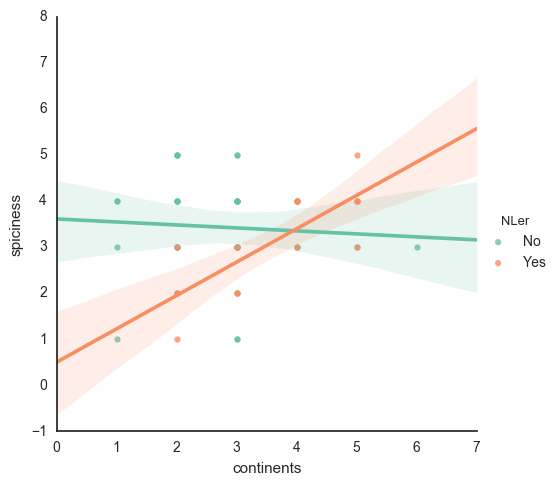

In [450]:
# A significant interaction has occured!! Notice how, since we plotted an interaction, the main
# effects were automatically included. Lets have a look at that interaction

plt.close()
sns.lmplot('continents','spiciness',hue='NLer',data=mv_df,palette='Set2')
plt.show()

In [460]:
# Wow! Apparently Dutch people who have visited more continents like spicy food more, (or vice
# versa), but that logic doesn't seem to apply to folks born outside NL!

# Just for the heck of it, lets use a different statsmodel function to compare model fit of
# these two models

from statsmodels.stats.anova import anova_lm

anova_lm(model1,model3)

//anaconda/envs/py3/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
//anaconda/envs/py3/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
//anaconda/envs/py3/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,51.0,63.047297,0.0,NaN,NaN,NaN
1,49.0,48.897674,2.0,14.149623,7.089617,0.001976


In [ ]:
# Well.. there are a bunch of inauspicious warnings, but... if we ignore them, we see a
# significant change in model fit!

In [475]:
# Lets look at another example. They say being good at sports gets you the gals/girls. Lets
# see if that holds true
smf.ols('relationships ~ sports',data=mv_df).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          relationships   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.211
Date:                Mon, 17 Apr 2017   Prob (F-statistic):             0.0793
Time:                        01:42:14   Log-Likelihood:                -99.148
No. Observations:                  51   AIC:                             202.3
Df Residuals:                      49   BIC:                             206.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3686      0.764      1.792      0.079      -0.166       2.903
sports         0.4037      0.225      1.792      0.079      -0.049       0.856
==============================================================================
Omnibus:                       22.258   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.220
Skew:                           1.417   Prob(JB):                     2.25e-08
Kurtosis:                       5.923   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [477]:
# Maybe if we had a bigger sample size it would be significant, but for now it appears to be
# a trend. But what if the problem is that we're sampling from two different distributions.
# Maybe there's some sort of confound in here -- perhaps NLers are both more likely to say
# they're good at sports AND also more likely to have been in more relationships. Lets enter
# NLer status into the model and see what happens.

smf.ols('relationships ~ sports + NLer',data=mv_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          relationships   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     3.533
Date:                Mon, 17 Apr 2017   Prob (F-statistic):             0.0370
Time:                        01:45:51   Log-Likelihood:                -97.264
No. Observations:                  51   AIC:                             200.5
Df Residuals:                      48   BIC:                             206.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.4320      0.744      1.924      0.060      -0.064       2.928
NLer[T.Yes]    -0.9883      0.515     -1.918      0.061      -2.024       0.048
sports          0.4804      0.223      2.154      0.036       0.032       0.929
==============================================================================
Omnibus:                       19.727   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.716
Skew:                           1.331   Prob(JB):                     9.58e-07
Kurtosis:                       5.441   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

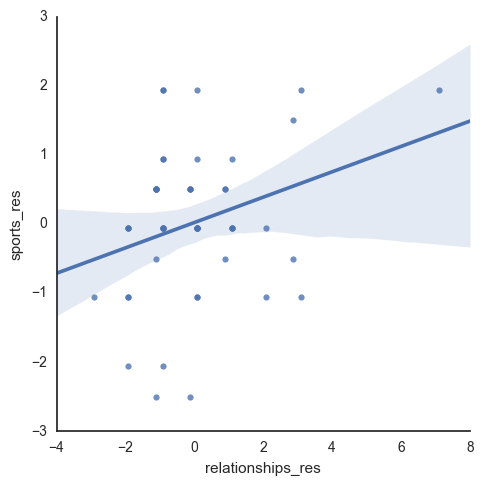

In [480]:
# Now the effect of self-described sportiness is significantly associated with number of 
# relationships! But if we want to plot it, we'll need the residuals. Luckily, the integration
# between statsmodels and seaborn through pandas makes this all pretty painless.

# first run the models to get the residuals and put them into our dataframe

mv_df['relationships_res'] = smf.ols('relationships ~ NLer',data=mv_df).fit().resid
mv_df['sports_res'] = smf.ols('sports ~ NLer',data=mv_df).fit().resid

# and now we plot
plt.close()
sns.lmplot('relationships_res','sports_res',data=mv_df)
plt.show()

In [ ]:
# As usual, there is SOOOO much more I could show you -- we're barely scratching the surface
# here. The point is, if there is some sort of statistical procedure you'd like to perform,
# chances are very high that python has a nice implementation of it, and a way for you to plot
# it. 

# The online documentation and tutorials for seaborn is excellent. With statsmodels.. its,
# okay, but it least documentation exists can be referenced. Scipy has a great deal of 
# functionality that extends far beyond basic stats, and a huge user-base online. Now that you
# know some of the basics, it shouldn't be hard to get your feet wet doing what it is you want
# to do.

In [295]:
# FIND ASSOCIATIONS BETWEEN VARIABLES
# THINGS TO SHOW OFF:
   
    # OPENING STATEMENT -- WHY PYTHON FOR DATA ANALYSIS? 
    # ASSIGNMENT + EMAIL
    # EXERCISES
    
    # Exercise, write function that checks normality and homogeneity of variances and
    # performs appropriate test
    
    # Exercise, look at and plot NLer, languages and relationships interaction

In [413]:
rdf,dvs,col_dir = prep_frame(tstcols,ndf)
rdf.head()

,What operating,Were you born,If you had to,How spicy do y,What are your,What color is,When you adjus,How many roman,Pick a number,How many sibli,...,programmin_exp,img_software_e,stats_exp,food_pickiness,drink_flexibil,sandwich_flexi,languages,Time of day,aggression,Uniqueness
0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,NaN,48.0,4.0,...,1.0,2.0,1.0,1.0,5.0,1.0,4.0,1.0,15.0,48.0
1,2.0,1.0,2.0,4.0,1.0,2.0,1.0,1.0,17.0,1.0,...,1.0,2.0,1.0,0.0,5.0,5.0,3.0,1.0,15.0,39.0
2,3.0,1.0,3.0,4.0,2.0,3.0,1.0,1.0,56.0,1.0,...,1.0,2.0,1.0,0.0,3.0,2.0,2.0,1.0,14.0,27.0
3,2.0,2.0,3.0,3.0,2.0,3.0,1.0,1.0,47.0,2.0,...,1.0,3.0,1.0,0.0,4.0,4.0,3.0,2.0,755.0,27.0
4,2.0,1.0,2.0,4.0,1.0,1.0,1.0,3.0,69.0,1.0,...,1.0,4.0,1.0,1.0,4.0,3.0,1.0,2.0,37.0,52.0


In [390]:
data=rdf

In [417]:
done = []
for i,dv_col in enumerate(dvs):
    print('working on DV %s of %s'%(i,len(dvs)))
    dv = data[dv_col]
    for iva_col in data.columns:
        if iva_col == dv_col:
            continue
        if (iva_col,dv_col) in done:
            continue
        else:
            done.append((dv_col,iva_col))
        iva = data[iva_col]
        for ivb_col in data.columns:
            if ivb_col == iva_col or ivb_col == dv_col:
                continue
            if (dv_col,ivb_col,iva_col) in done:
                continue
            else:
                done.append((dv_col,iva_col,ivb_col))
            ivb = data[ivb_col]
            inter,changer = multivariate_test(dv,iva,ivb,data)
            if inter:
                print('\n>>>>Interaction: %s      vs     %s    on    %s <<<<<<<<<'%
                          (col_dir[iva_col], col_dir[ivb_col], col_dir[dv_col]))
            if changer:
                print('\n*****Change: %s     vs     %s     on     %s'%
                         (col_dir[iva_col],col_dir[ivb_col],col_dir[dv_col]))
    

working on DV 0 of 20

>>>>Interaction: What operating system do you most prefer?      vs     What color is this dress? (If you're familiar with this image, what color did you think it was when you first saw it)    on    How spicy do you like your food? <<<<<<<<<

*****Change: What operating system do you most prefer?     vs     How good do you think you are a driving (3 is average)     on     How spicy do you like your food?

>>>>Interaction: Were you born in the Netherlands?      vs     How many romantic relationships have you been in that have lasted at least 6 months    on    How spicy do you like your food? <<<<<<<<<

>>>>Interaction: Were you born in the Netherlands?      vs     How many continents have you visited    on    How spicy do you like your food? <<<<<<<<<

>>>>Interaction: Were you born in the Netherlands?      vs     Do you have any food allergies or intolerances?    on    How spicy do you like your food? <<<<<<<<<

>>>>Interaction: Were you born in the Netherlands?  

KeyboardInterrupt: 

In [412]:
col_dir

{'Are you ne': 'Are you nervous about flying?',
 'Assuming y': 'Assuming you stayed relatively healthy but aged normally, how old would you want to live to be?',
 'Can you ro': 'Can you roll your tongue?',
 'Can you wh': 'Can you whistle?',
 'Do you eve': 'Do you ever eat/drink condiments straight from the bottle/can?',
 'Do you fee': 'Do you feel sleepy a lot?',
 'Do you hav': 'Do you have any food allergies or intolerances?',
 'Do you oft': 'Do you often go to bed later than you wanted to?',
 'Do you usu': 'Do you usually remember your dreams?',
 'Exactly ho': 'Exactly how far in km is your commute to work?',
 'Have you e': 'Have you ever practiced any non-allergy based dietary restrictions (e.g. vegetarian, gluten-free, vegan, etc)',
 'How good a': 'How good are you at sports?',
 'How good d': 'How good do you think you are a driving (3 is average)',
 'How many c': 'How many cities have you lived in for at least six months',
 'How many h': 'How many hours of sleep do you typically g

In [85]:
#x = "What style of music do you most prefer?"
#y = 'Do you often go to bed later than you wanted to?'
#tstdf[x] = tstdf[x].astype('category')
#tstdf[y] = pandas.to_numeric(tstdf[y],errors='coerce')
plt.close()

In [73]:
tst = pandas.crosstab(ndf["What style of music do you most prefer?"],ndf['Do you often go to bed later than you wanted to?'])

In [ ]:
icol,jcol
x,y = i, j
x,y
#jnk1 = us.encode(x.dropna())
#jnk2 = us.encode(y.dropna())
#
#jnk1,jnk2

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
# Highly significant! But we're not done yet... perhaps with a sample size this low, a group
# of random numbers might form a quadratic spontaneous relationship more frequently then we
# might think.

# Combining our knowledge of For loops and our newfangled statistical abilities, we can easily 
# perform some permuation testing!

# In other words, we can quickly generate 1000 pairs of random arrays from 1-100, test the
# presence of a quadratic relationship in each of them, and see the probability that the
# relationship we observed would happen just out of sheer chance!

# All we need to do create a for loop where, inside, we generate two random arrays of numbers
# from 1-100, then perform the same operations and statistics we did above, and save the 
# outputs for each!

# NOTE: When running permuation testing, it is important to optimize code as much as possible
# because you are often performing many computations. However, optimized code is often hard
# to read, especially for beginners, so here I will leave it straightforward and readable at
# the cost of speed (its not very computationally complex anyway).

rs = []
ses = []

for i in range(1000):
    # create x and y
    x = np.random.randint(1,101,len(rand1))
    y = np.random.randint(1,101,len(rand1))
    # rank them
    rx = stat.rankdata(x,method='min')
    ry = stat.rankdata(y,method='min')
    # find quadratic fit
    fit = np.polyfit(rx,ry,2)
    f = np.poly1d(fit)
    new_y = f(x)
    # run association
    slp,inter,newr,newp,se = stat.linregress(x,new_y)
    # save output
    rs.append(newr)
    ses.append(se)

print('done! List rs is now length %s'%len(rs))

In [ ]:
# Now we can see where our test value falls within the null distribution...
# There are many ways to do this. This is a very efficient way but its easy to follow.
# For each value in rs, if the value is higher than our observed test statistic, we store it.
# At the end, we find the p-value by finding the ratio of value greater than out test
# test statistic vs. the total sample of 1000 tests.

cont = []
for v in sorted(ses):
    if v < stderr:
        cont.append(v)
exact_p = len(cont)/float((len(ses)+1))
print(exact_p)

In [ ]:
# Whoops! Looks like quadratic relationships are very frequent in ranked random data!
# Let's plot the most recent iteration (#1000) to make sure

jnk = pandas.concat([pandas.Series(rx),pandas.Series(ry),pandas.Series(new_y)], axis=1)
jnk.columns = ['rx','ry','new_y']
sns.lmplot('rx','ry',jnk,order=2)
plt.show()
print(newr)

In [ ]:
# I guess its pretty hard to trust p-values in these types of relationships indeed!
# Let's look at where our relationship falls in the null distribution

sns.kdeplot(rs)
plt.axvline(v, color='red')

In [ ]:
# So if we were to interpret this like faith, we would conclude that individuals who pick
# low numbers or high numbers to start continue on to pick low numbers later, but those who
# pick more centrally-tending numbers tend to pick higher numbers later.

# This of course probably nonsense

sorted(rand1)[20:30]

In [ ]:

# BOOTSTRAP TO TEST IF THIS RELATIONSHIP LIKELY TO OCCUR BY CHANCE
# TEST IF IS RELATED TO ANY OTHER VARIABLE AND FDR CORRECT